In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn
import numpy as np
import pymc3 as pm
from scipy.linalg import norm

İki boyutlu düzlemde $s_1, s_2, s_3$ noktalarında sabitlenmiş dedektörlerimiz, ve bilinmeyen bir $X$ noktasında sabit duran bir nesnemiz var. Dedektörler aranan nesnenin kendilerine olan $y_i=\lVert X-s_i\rVert$ mesafesini (varyansı $\sigma_y^2$ olan bir hatayla) belirleyebiliyorlar, ama yönünü tespit edemiyorlar.

Olabilirlik:

$$y_i \vert X \sim N(\lVert X-s_i\rVert, \sigma_y)$$

Amacımız $p(X\vert y_{1:3})$ olasılık yoğunluğunu bulmak.

Üç dedektör sırayla $s_1 = (0,2)$, $s_2=(-2,-1)$, $s_3=(1,-2)$ noktalarına yerleştirilmiş olsun. Nesneye olan mesafeler $y_1=2$, $y_2=1.6$, $y_3=2.5$ olarak ölçülmüş olsun. Dedektör ölçümlerinin standart sapması olarak $\sigma_y = 1$ diyelim.

In [2]:
s1 = np.array([0,2])
s2 = np.array([-2,-1])
s3 = np.array([1, -2])
y1, y2, y3 = 2, 1.6, 2.5
σx = 10
σy = 1
xcov = (σx**2) * np.identity(2)

Modeli kuralım. $X$ için iki değişkenli bir normal dağılımı önsel alalım. Her iki yönde önsel standart sapması $\sigma_x = 10$ olsun.
$$\begin{eqnarray}
X &\sim& N\left( \mathbf{0}, \sigma_x^2 I_2 \right)\\
Y_i \vert X &\sim& N\left(\lVert X-s_i \rVert, \sigma_y^2\right)
\end{eqnarray}
$$

In [3]:
hedef_modeli = pm.Model()
with hedef_modeli:
    X = pm.MvNormal("X", mu = np.zeros(2), cov=xcov, shape=2)
    Y1 = pm.Normal("Y1", mu = norm(X-s1), sd = σy, observed = y1)
    Y2 = pm.Normal("Y2", mu = norm(X-s2), sd = σy, observed = y2)
    Y3 = pm.Normal("Y3", mu = norm(X-s3), sd = σy, observed = y3)
    zincir = pm.sample(10000,n_init=10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -12.056: 100%|██████████| 10000/10000 [00:00<00:00, 11409.52it/s]
Finished [100%]: Average ELBO = -12.001
100%|██████████| 10000/10000 [00:09<00:00, 1004.86it/s]


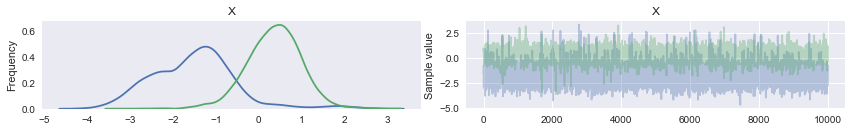

In [4]:
pm.traceplot(zincir);

Hedefin beklenen pozisyonu zincir değerlerinin ortalaması alınarak bulunabilir.

In [5]:
x1 = zincir["X"][:,0].mean()
x2 = zincir["X"][:,1].mean()
x1, x2

(-1.5154492765328196, 0.33876831905214411)

Zincirdeki numune noktaları kullanarak sonsal dağılımı iki boyutta görselleyebiliriz. Dedektörlerin sabit pozisyonunu çarpı işaretleriyle gösterelim.

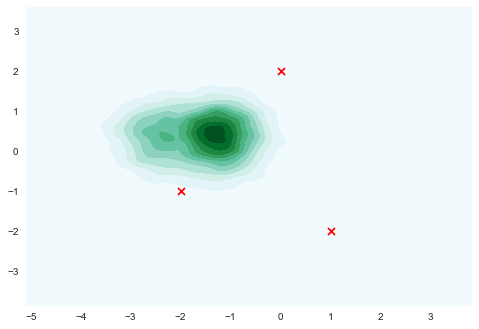

In [6]:
seaborn.kdeplot(zincir["X"][:,0],zincir["X"][:,1], shade=True)
plt.scatter([s1[0], s2[0], s3[0]], [s1[1], s2[1], s3[1]], c="r", marker="x");

## Çalışma

1. Dördüncü bir dedektör $s_4 = (-4,2)$ noktasına yerleştirilmiş olsun. Bu dedektör aynı nesneyi $y_4=3$ mesafede tespit ediyor. Bu yeni dedektörü hesaba katarak modeli tekrar çalıştırın ve sonsal $p(X | y_{1:4})$ yoğunluğunu çizdirin.
1. Uygun gördüğünüz bir konuma beşinci bir dedektör yerleştirin ve uygun bulduğunuz bir $y_5$ verisi ekleyerek modeli tekrar çalıştırın. Sonsal yoğunluğu tekrar çizdirin.
1. Üç dedektörden her birinin tekrar tekrar veri topladığını düşünelim. İkişer veri noktasıyla sonsal dağılım nasıl görünür? Üçer ve dörder veri noktasıyla? (Bu işlem için nesnenin yerini bildiğinizi varsayıp $\sigma_y^2$ varyansla sentetik veri üretebilirsiniz.)